In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
import tensorflow as tf
import matplotlib.pyplot as plt
import random

C:\___Anaconda\envs\forTF\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\___Anaconda\envs\forTF\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\___Anaconda\envs\forTF\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\___Anaconda\envs\forTF\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: P

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [21]:
# Parameters
learning_rate = 0.0001
training_epochs = 400
batch_size = 100
display_step = 1

In [3]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

#X = tf.nn.dropout(X, keep_prob=keep_prob)

#W1 = tf.Variable(tf.random_normal([784, 256]))
#W1 = tf.get_variable('W1', shape=[784,100], initializer=tf.contrib.layers.xavier_initializer())
#b1 = tf.Variable(tf.random_normal([100]))
#L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
#L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

#W2 = tf.Variable(tf.random_normal([256, 256]))
#W2 = tf.get_variable('W2', shape=[256,256], initializer=tf.contrib.layers.xavier_initializer())
#b2 = tf.Variable(tf.random_normal([256]))
#L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
#L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

#W3 = tf.Variable(tf.random_normal([256, 10]))
W3 = tf.get_variable('W3', shape=[784,10], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(X, W3) + b3

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
#optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [22]:
# Training
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# Training cycle
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        #feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch #뭉치갯수로 나누기
        
    print('Epoch : ', '%04d' % (epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))


Epoch :  0001 cost =  1.781276995
Epoch :  0002 cost =  0.996627649
Epoch :  0003 cost =  0.735292177
Epoch :  0004 cost =  0.607614563
Epoch :  0005 cost =  0.532203963
Epoch :  0006 cost =  0.482341519
Epoch :  0007 cost =  0.446955998
Epoch :  0008 cost =  0.420713165
Epoch :  0009 cost =  0.400598351
Epoch :  0010 cost =  0.384738365
Epoch :  0011 cost =  0.371930886
Epoch :  0012 cost =  0.361418578
Epoch :  0013 cost =  0.352651955
Epoch :  0014 cost =  0.345238192
Epoch :  0015 cost =  0.338858802
Epoch :  0016 cost =  0.333446552
Epoch :  0017 cost =  0.328588937
Epoch :  0018 cost =  0.324270409
Epoch :  0019 cost =  0.320471069
Epoch :  0020 cost =  0.317006457
Epoch :  0021 cost =  0.313864655
Epoch :  0022 cost =  0.311049995
Epoch :  0023 cost =  0.308358924
Epoch :  0024 cost =  0.305983966
Epoch :  0025 cost =  0.303779067
Epoch :  0026 cost =  0.301725099
Epoch :  0027 cost =  0.299819750
Epoch :  0028 cost =  0.298033950
Epoch :  0029 cost =  0.296263606
Epoch :  0030 

Epoch :  0242 cost =  0.236141734
Epoch :  0243 cost =  0.236093694
Epoch :  0244 cost =  0.235963194
Epoch :  0245 cost =  0.235932795
Epoch :  0246 cost =  0.235897139
Epoch :  0247 cost =  0.235723417
Epoch :  0248 cost =  0.235739887
Epoch :  0249 cost =  0.235632759
Epoch :  0250 cost =  0.235566282
Epoch :  0251 cost =  0.235451209
Epoch :  0252 cost =  0.235456822
Epoch :  0253 cost =  0.235388896
Epoch :  0254 cost =  0.235281861
Epoch :  0255 cost =  0.235251004
Epoch :  0256 cost =  0.235171187
Epoch :  0257 cost =  0.235086074
Epoch :  0258 cost =  0.234998144
Epoch :  0259 cost =  0.234965622
Epoch :  0260 cost =  0.234898383
Epoch :  0261 cost =  0.234807926
Epoch :  0262 cost =  0.234740512
Epoch :  0263 cost =  0.234677776
Epoch :  0264 cost =  0.234623643
Epoch :  0265 cost =  0.234542800
Epoch :  0266 cost =  0.234471920
Epoch :  0267 cost =  0.234392614
Epoch :  0268 cost =  0.234394848
Epoch :  0269 cost =  0.234236554
Epoch :  0270 cost =  0.234269848
Epoch :  0271 

Accuracy :  0.9287
Label: [0]
Prediction: [0]


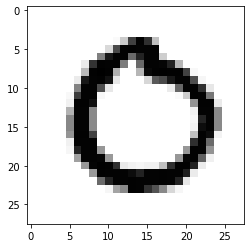

In [23]:
# TEST
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

feed_dict = {X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}
print("Accuracy : ", accuracy.eval(session=sess, feed_dict=feed_dict))

r = random.randint(0, mnist.test.num_examples - 1)
print('Label:', sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
print('Prediction:', sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r+1], keep_prob: 1}))

plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

In [11]:
#sess.close()